# Financial Indicators of US Stocks – Multiple Machine Learning Models Analysis

## Part 1 - Prepare the data

### Start by importing the data

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# To make this work in a basic way just run `pip install autogluon`
# in your dev environment.
from autogluon.tabular import TabularPredictor, TabularDataset

# Show all columns and rows of the dataframes
pd.set_option('max_columns', None)

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
financial_df = pd.read_csv(Path("Resources/2018_Financial_Data.csv"))

# Review the DataFrame
financial_df.sample(50)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per S

In [3]:
len(financial_df)

4392

In [4]:
financial_df.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2019 PRICE VAR [%]', 'Class'],
      dtype='object', length=225)

In [5]:
# Drop the name column as it won't be used.
financial_df = financial_df.drop(columns=['Unnamed: 0'])

### Clean the data

#### Remove rows with too many NaN

In [6]:
# Remove rows where more than 5% of the values are NaN.
num_columns = len(financial_df.columns)
max_nan_per_row = round(num_columns * 0.05)
threshold = num_columns - max_nan_per_row

financial_df = financial_df.dropna(axis=0, thresh=threshold)
financial_df = financial_df.reset_index(drop=True)
financial_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Op

#### Remove columns with too many NaN

In [7]:
# Remove columns where more than 20% of the rows have a NaN in that column.
num_rows = len(financial_df)
max_nan_per_col = round(num_rows * 0.20)
threshold = num_rows - max_nan_per_col

financial_df = financial_df.dropna(axis=1, thresh=threshold)
financial_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per S

#### Remove rows with too many zeros

In [8]:
# Create a filter of what the percentage of nonzero value are in each row.
filter = (financial_df != 0).mean(axis=1)
filter

0       0.918552
1       0.954751
2       0.968326
3       0.918552
4       0.855204
          ...   
2164    0.914027
2165    0.864253
2166    0.864253
2167    0.855204
2168    0.877828
Length: 2169, dtype: float64

In [9]:
# Turn the filter into a boolean filter that chooses rows with at least 90% nonzero values.
filter = filter >= 0.90
filter

0        True
1        True
2        True
3        True
4       False
        ...  
2164     True
2165    False
2166    False
2167    False
2168    False
Length: 2169, dtype: bool

In [10]:
# Keep rows based on the boolean filter.
financial_df = financial_df.loc[filter]
financial_df = financial_df.reset_index(drop=True)
financial_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per S

#### Remove columns with too many zeros

In [11]:
# Create a filter of what the percentage of nonzero value are in each column.
filter = (financial_df != 0).mean()
filter

Revenue                 1.000000
Revenue Growth          0.996743
Cost of Revenue         0.977199
Gross Profit            1.000000
R&D Expenses            0.317047
                          ...   
R&D Expense Growth      0.312704
SG&A Expenses Growth    0.950054
Sector                  1.000000
2019 PRICE VAR [%]      1.000000
Class                   0.823018
Length: 221, dtype: float64

In [12]:
# Create a list of categorical variables. 
categorical_variables = list(financial_df.dtypes[financial_df.dtypes == "object"].index)

# Display the categorical variables list.
categorical_variables

['Sector']

In [13]:
# Turn the filter into a boolean filter that chooses columns with at least 60% nonzero values.
filter = filter >= 0.60

# However, set categorical variables to true because we want to keep those no matter what the
# percentage of zero is.
for name in categorical_variables:
    filter.loc[name] = True

# Also set the target columns to true because we want to keep those as well.
filter.loc['2019 PRICE VAR [%]'] = True
filter.loc['Class'] = True
filter

Revenue                  True
Revenue Growth           True
Cost of Revenue          True
Gross Profit             True
R&D Expenses            False
                        ...  
R&D Expense Growth      False
SG&A Expenses Growth     True
Sector                   True
2019 PRICE VAR [%]       True
Class                    True
Length: 221, dtype: bool

In [14]:
# Keep columns based on the boolean filter.
financial_df = financial_df.loc[:, filter]
financial_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend p

### Save intermediate DataFrame

In [15]:
# Save this DataFrame as a csv.
financial_df.to_csv(Path('too_many_zeros_and_nan_rem.csv'))

### Encode categorical data

In [16]:
# Create a list of categorical variables. 
categorical_variables = list(financial_df.dtypes[financial_df.dtypes == "object"].index)

# Display the categorical variables list.
categorical_variables

['Sector']

In [17]:
# See if categorical variables have any NaN.
financial_df[categorical_variables].isnull().sum()

Sector    0
dtype: int64

In [18]:
# Create a OneHotEncoder instance.
enc = OneHotEncoder(sparse=False)

In [19]:
# Encode the categorcal variables using OneHotEncoder.
encoded_data = enc.fit_transform(financial_df[categorical_variables])

In [20]:
# Create a DataFrame with the encoded variables.
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names(categorical_variables))
encoded_df

,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
# Add the numerical variables from the original DataFrame to the one-hot encoded DataFrame.
encoded_df = pd.concat(
    [
        financial_df.drop(columns=categorical_variables),
        encoded_df
    ],
    axis=1
)
     
# Review the Dataframe
encoded_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend p

### Separate the data into targets and feature data

In [22]:
# Create a target series for regression modeling.
y_regression = encoded_df['2019 PRICE VAR [%]']
y_regression

0      32.794573
1      40.588068
2      30.295514
3      64.213737
4      88.742465
         ...    
916    -1.834495
917    12.699200
918   -11.218172
919    16.453900
920    26.169646
Name: 2019 PRICE VAR [%], Length: 921, dtype: float64

In [23]:
# Create a target series for classification modeling.
y_classification = encoded_df['Class']
y_classification

0      1
1      1
2      1
3      1
4      1
      ..
916    0
917    1
918    0
919    1
920    1
Name: Class, Length: 921, dtype: int64

In [24]:
# Create features dataframe for raw data features.
X_raw = encoded_df.drop(columns=['2019 PRICE VAR [%]', 'Class'])
X_raw.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend p

In [25]:
# Identify 6 Key Financial Values/Ratios for a second features DataFrame.
key_financial_values = [
    'Working Capital',
    'quickRatio',
    'EPS',
    'priceEarningsRatio',
    'debtEquityRatio',
    'ROE'
]

# Create a features dataframe for Key Financial Values/Ratios.

X_key = encoded_df[key_financial_values]
X_key

,Working Capital,quickRatio,EPS,priceEarningsRatio,debtEquityRatio,ROE
0,-5.755000e+09,0.540449,2.56,13.3008,1.5604,0.1638
1,-1.835000e+09,0.632261,0.66,23.3030,1.1083,0.0478
2,1.216100e+10,1.105016,4.57,10.2691,0.3535,0.2824
3,1.028500e+10,2.134168,12.27,4.2999,0.1436,0.4377
4,1.541000e+10,0.994540,12.01,18.9226,1.0685,0.5556
...,...,...,...,...,...,...
916,-8.547247e+06,0.172724,0.95,27.6842,0.8836,0.0917
917,7.363752e+06,1.227623,0.50,24.4000,0.1293,0.1516
918,2.314100e+07,2.196235,1.54,6.4610,0.0994,0.1110
919,2.226180e+08,1.421740,2.88,35.9375,0.4298,0.0812


### Split the features and target sets into training and testing datasets

In [26]:
# Split the preprocessed data into training and testing datasets for each feature and
# target set combination we have:
# X_raw
# X_key
# y_regression
# y_classification

X_raw_regr_train, X_raw_regr_test, y_raw_regr_train, y_raw_regr_test = train_test_split(
    X_raw, y_regression,
    random_state=1
)

X_key_regr_train, X_key_regr_test, y_key_regr_train, y_key_regr_test = train_test_split(
    X_key, y_regression,
    random_state=1
)

X_raw_class_train, X_raw_class_test, y_raw_class_train, y_raw_class_test = train_test_split(
    X_raw, y_classification,
    random_state=1
)

X_key_class_train, X_key_class_test, y_key_class_train, y_key_class_test = train_test_split(
    X_key, y_classification,
    random_state=1
)

### Convert remaining NaN values (final cleaning)

In [27]:
# Confirm target series for regression modeling does not have any NaN.
y_regression.isnull().sum()

0

In [28]:
# Confirm target series for classification modeling does not have any NaN.
y_classification.isnull().sum()

0

In [29]:
# See how many remaining NaN values are in the raw features DataFrame.
X_raw.isnull().sum().sum()

1203

In [30]:
# See how many remaining NaN values are in the key features DataFrame.
X_key.isnull().sum().sum()

50

In [31]:
# We can use describe to look at minimum values in each column.  If a lot of them are zero, then maybe
# imputing remaining NaNs with zeros could be a good choice.
X_raw.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend p

In [32]:
# Because many of the min values are nonzero, we will go with another approach to dealing with NaN values.

#### Replace NaN values by imputing them with the mean for each column

In [33]:
# X_raw_regr_train, X_raw_regr_test

# Use the SimpleImputer to fill NaN values with the mean for each column.
X_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the features training DataFrame.
X_imputer.fit(X_raw_regr_train)

# Impute the missing values into the training and test DataFrames.
X_raw_regr_train_i = X_imputer.transform(X_raw_regr_train)
X_raw_regr_test_i = X_imputer.transform(X_raw_regr_test)

In [34]:
# Review the data with imputed missing values as a DataFrame.
X_raw_regr_train_i_df = pd.DataFrame(X_raw_regr_train_i, columns=X_raw_regr_train.columns)
X_raw_regr_train_i_df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend p

In [35]:
# Check for any NaN to make sure it worked.
X_raw_regr_train_i_df.isnull().sum().sum()

0

In [36]:
# Check for any NaN to make sure it worked.
X_raw_regr_test_i_df = pd.DataFrame(X_raw_regr_test_i, columns=X_raw_regr_test.columns)
X_raw_regr_test_i_df.isnull().sum().sum()

0

In [37]:
# X_key_regr_train, X_key_regr_test

# Create an IterativeImputer instance.
X_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the features training DataFrame.
X_imputer.fit(X_key_regr_train)

# Impute the missing values into the training and test DataFrames.
X_key_regr_train_i = X_imputer.transform(X_key_regr_train)
X_key_regr_test_i = X_imputer.transform(X_key_regr_test)

In [38]:
# X_raw_class_train, X_raw_class_test

# Create an IterativeImputer instance.
X_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the features training DataFrame.
X_imputer.fit(X_raw_class_train)

# Impute the missing values into the training and test DataFrames.
X_raw_class_train_i = X_imputer.transform(X_raw_class_train)
X_raw_class_test_i = X_imputer.transform(X_raw_class_test)

In [39]:
# X_key_class_train, X_key_class_test

# Create an IterativeImputer instance.
X_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the features training DataFrame.
X_imputer.fit(X_key_class_train)

# Impute the missing values into the training and test DataFrames.
X_key_class_train_i = X_imputer.transform(X_key_class_train)
X_key_class_test_i = X_imputer.transform(X_key_class_test)

### Scale the feature data

In [40]:
# X_raw_regr_train, X_raw_regr_test

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_raw_regr_train_i)

# Fit the scaler to the features training dataset
X_raw_regr_train_scaled = X_scaler.transform(X_raw_regr_train_i)
X_raw_regr_test_scaled = X_scaler.transform(X_raw_regr_test_i)

In [41]:
# Review the scaled training data as a DataFrame.
pd.DataFrame(X_raw_regr_train_scaled, columns=X_raw_regr_train.columns)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend p

In [42]:
# X_key_regr_train, X_key_regr_test

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_key_regr_train_i)

# Fit the scaler to the features training dataset
X_key_regr_train_scaled = X_scaler.transform(X_key_regr_train_i)
X_key_regr_test_scaled = X_scaler.transform(X_key_regr_test_i)

In [43]:
# X_raw_class_train, X_raw_class_test

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_raw_class_train_i)

# Fit the scaler to the features training dataset
X_raw_class_train_scaled = X_scaler.transform(X_raw_class_train_i)
X_raw_class_test_scaled = X_scaler.transform(X_raw_class_test_i)

In [44]:
# X_key_class_train, X_key_class_test

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_key_class_train_i)

# Fit the scaler to the features training dataset
X_key_class_train_scaled = X_scaler.transform(X_key_class_train_i)
X_key_class_test_scaled = X_scaler.transform(X_key_class_test_i)

## Part 2 - Use AutoGluon to clean and predict

### Separate the data into targets and feature data

In [45]:
# For this we go back to the financial dataframe where rows and columns with too many NaNs
# and zeros have been removed, but no replacement of NaN values or encoding of categorical
# data has been done. We will let AutoGluon handle the cleaning and encoding processes.

In [46]:
# Create target dataset.  We will use AutoGluon for classification only.
ag_y = financial_df['Class']

# Create features dataset.
ag_X = financial_df.drop(columns=['2019 PRICE VAR [%]', 'Class'])

### Split the features and target sets into training and testing datasets

In [47]:
# Split the data into training and testing datasets.
ag_X_train, ag_X_test, ag_y_train, ag_y_test = train_test_split(
    ag_X, ag_y,
    random_state=1
)

In [48]:
# Concatinate the features and target training data together again because AutoGluon expects
# them to be together when fitting.
ag_train = pd.concat([ag_X_train, ag_y_train], axis=1)
     
# Review the Dataframe.
ag_train.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Tax Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend p

### Use AutoGluon to fit multiple models

In [49]:
# Put training data that includes features and target label into an AutoGluon Dataset object.
train_data = TabularDataset(ag_train)

In [50]:
# Use the training data to fit multiple models.
ag_predictor = TabularPredictor(label='Class').fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20210915_031052/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210915_031052/"
AutoGluon Version:  0.3.1
Train Data Rows:    690
Train Data Columns: 206
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    7304.81 MB
	Train Data (Original)  Memory Usage: 1.18 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of

AutoGluon training complete, total runtime = 18.35s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20210915_031052/")


### Make predictions

In [51]:
# Put test data that only contains features into an AutoGluon Dataset object.
test_data_no_label = TabularDataset(ag_X_test)

In [52]:
# Make predictions using the model.
ag_y_pred = ag_predictor.predict(test_data_no_label)

### Evaluate performance of the predictions

In [53]:
# Evaluate the predictions.
perf = ag_predictor.evaluate_predictions(
    y_true=ag_y_test,
    y_pred=ag_y_pred,
    auxiliary_metrics=True
)

Evaluation: accuracy on test data: 0.8008658008658008
Evaluations on test data:
{
    "accuracy": 0.8008658008658008,
    "balanced_accuracy": 0.544973544973545,
    "mcc": 0.13663546628161674,
    "f1": 0.886138613861386,
    "precision": 0.8325581395348837,
    "recall": 0.9470899470899471
}


In [53]:
# Create a classification report for the AutoGluon predictions.
ag_training_report = classification_report(ag_y_test, ag_y_pred)

# Print the report.
print(ag_training_report)

              precision    recall  f1-score   support

           0       0.38      0.12      0.18        42
           1       0.83      0.96      0.89       189

    accuracy                           0.81       231
   macro avg       0.61      0.54      0.54       231
weighted avg       0.75      0.81      0.76       231



### Classification SVM Raw

In [54]:
# Import the SVM model & classification_report
from sklearn import svm

from sklearn.metrics import classification_report

In [55]:
# Create the classifier model using the raw data
svm_model = svm.SVC()

# Fit the model using X_raw_class_train_scaled & y_raw_class_train
svm_model = svm_model.fit(X_raw_class_train_scaled,y_raw_class_train)

# Use the trained model to predict the signals for the training data
training_raw_predictions = svm_model.predict(X_raw_class_test_scaled)

# Display the sample predictions
training_raw_predictions[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
# Evaluate the model using classification report
training_report = classification_report(y_raw_class_test, training_raw_predictions)
print(training_report)

              precision    recall  f1-score   support

           0       1.00      0.02      0.05        42
           1       0.82      1.00      0.90       189

    accuracy                           0.82       231
   macro avg       0.91      0.51      0.47       231
weighted avg       0.85      0.82      0.75       231



### Classification SVM Key

In [57]:
# Create the classifier model using the key data
svm_model = svm.SVC()

# Fit the model using X_key_class_train_scaled & y_key_class_train
svm_model = svm_model.fit(X_key_class_train_scaled,y_key_class_train)

# Use the trained model to predict the trading signals for the training data
training_key_predictions = svm_model.predict(X_key_class_test_scaled)

# Display the sample predictions
training_key_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
# Evaluate the model using classification report
training_report = classification_report(y_key_class_test, training_key_predictions, zero_division=0)
print(training_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.82      1.00      0.90       189

    accuracy                           0.82       231
   macro avg       0.41      0.50      0.45       231
weighted avg       0.67      0.82      0.74       231



### Classification Random Forest Raw

In [59]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create the classifier model using raw data
rfc_model = RandomForestClassifier()

# Fit the model using X_raw_class_scaled & y_raw_class_train
rfc_model = rfc_model.fit(X_raw_class_train_scaled,y_raw_class_train)

# Use the trained model to predict the trading signals for the training data
training_raw_predictions = rfc_model.predict(X_raw_class_test_scaled)

# Display the sample predictions
training_raw_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
# Evaluate the model using classification report
training_report = classification_report(y_raw_class_test, training_raw_predictions)
print(training_report)

              precision    recall  f1-score   support

           0       0.33      0.10      0.15        42
           1       0.83      0.96      0.89       189

    accuracy                           0.80       231
   macro avg       0.58      0.53      0.52       231
weighted avg       0.74      0.80      0.75       231



### Classification Random Forest Key

In [61]:
# Create the classifier model using key data
rfc_model = RandomForestClassifier()

# Fit the model using X_key_class_scaled & y_key_class_train
rfc_model = rfc_model.fit(X_key_class_train_scaled,y_key_class_train)

# Use the trained model to predict the trading signals for the training data
training_raw_predictions = rfc_model.predict(X_key_class_test_scaled)

# Display the sample predictions
training_key_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
# Evaluate the model using classification report
training_report = classification_report(y_key_class_test, training_key_predictions, zero_division=0)
print(training_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.82      1.00      0.90       189

    accuracy                           0.82       231
   macro avg       0.41      0.50      0.45       231
weighted avg       0.67      0.82      0.74       231



# Create a shallow (`1` hidden layer) neural network for classification with 6 key ratios data

### Compile the Model

In [63]:
# create an instance of the Sequential model 
nn_shallow_6 = Sequential()

In [64]:
# create both an input layer containing two inputs and a hidden layer containing three neurons
number_inputs = 6
number_hidden_nodes = 3

nn_shallow_6.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))


In [65]:
# Add the output layer
nn_shallow_6.add(Dense(units=1, activation="sigmoid"))

In [66]:
# Display the Sequential model summary
nn_shallow_6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 21        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compile the model by using the compile() function provided by Keras
nn_shallow_6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Fit and Evaluate the Neural Network with the scaled 6 key ratios training data

In [68]:
# Fitting the model with 100 epochs using the training data X_key_class_train_scaled
model_shallow_6 = nn_shallow_6.fit(X_key_class_train_scaled, y_key_class_train, epochs=100)

Epoch 1/100
22/22 [==============================] - 0s 658us/step - loss: 0.8497 - accuracy: 0.5478
Epoch 2/100
22/22 [==============================] - 0s 673us/step - loss: 0.8201 - accuracy: 0.5870
Epoch 3/100
22/22 [==============================] - 0s 740us/step - loss: 0.7929 - accuracy: 0.6174
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7687 - accuracy: 0.6406
Epoch 5/100
22/22 [==============================] - 0s 856us/step - loss: 0.7458 - accuracy: 0.6710
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7248 - accuracy: 0.6841
Epoch 7/100
22/22 [==============================] - 0s 993us/step - loss: 0.7061 - accuracy: 0.6986
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.7159
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.7319
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.7449

22/22 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8217
Epoch 83/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8217
Epoch 84/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.8203
Epoch 85/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.8203
Epoch 86/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.8203
Epoch 87/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.8203
Epoch 88/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.8203
Epoch 89/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.8217
Epoch 90/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.8217
Epoch 91/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.8217
Epoch 92/100


#### *Plot the Loss and Accuracy

<AxesSubplot:>

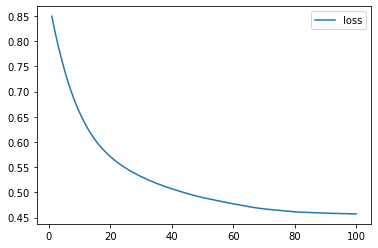

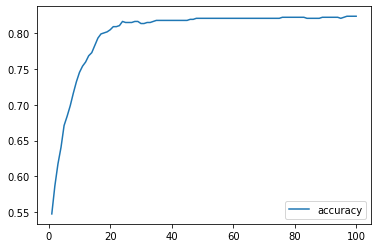

In [69]:
# Create a DataFrame with the history dictionary and an index parameter
df_history_shallow_6 = pd.DataFrame(model_shallow_6.history, index=range(1, len(model_shallow_6.history["loss"]) + 1))

# Plot the loss where the y-axis displays the loss metric
df_history_shallow_6.plot(y="loss")

# Plot the accuracy
df_history_shallow_6.plot(y="accuracy")

#### *Evaluate the model using testing data and the evaluate method.

In [70]:
# Evaluate shallow neural network using testing data
model_shallow_6_loss, model_shallow_6_accuracy = nn_shallow_6.evaluate(X_key_class_test_scaled, y_key_class_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_shallow_6_loss}, Accuracy: {model_shallow_6_accuracy}")

8/8 - 0s - loss: 0.5297 - accuracy: 0.8095
Loss: 0.529657244682312, Accuracy: 0.8095238208770752


### Make predictions with the shallow neural network model

In [71]:
# Make predictions with the model
predictions_shallow_6 = (nn_shallow_6.predict(X_key_class_test_scaled) > 0.5).astype("int32") 

In [72]:
# Create a DataFrame to compare the predictions with the actual values
results_shallow_6 = pd.DataFrame({"predictions": predictions_shallow_6.ravel(), "actual": y_key_class_test})

# Display sample data
results_shallow_6.head(10)

,predictions,actual
148,1,1
449,1,1
871,1,1
638,1,1
890,1,1
189,1,1
754,1,1
195,1,1
504,1,0
567,1,1


In [73]:
#Print the confusion matrix
training_matrix_shallow_6 = confusion_matrix(y_key_class_test, predictions_shallow_6)
print(training_matrix_shallow_6)

[[  0  42]
 [  2 187]]


In [74]:
# Save a classification report
training_report_shallow_6 = classification_report(y_key_class_test, predictions_shallow_6)

# Then view its output
print(training_report_shallow_6)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.82      0.99      0.89       189

    accuracy                           0.81       231
   macro avg       0.41      0.49      0.45       231
weighted avg       0.67      0.81      0.73       231



# Create a deep neural network (with two layers) for classification with 6 key ratios data

### Compile the Model

In [75]:
# Define the model - deep neural net with two hidden layers
number_input_features = 6
hidden_nodes_layer1 = 3
hidden_nodes_layer2 = 2

# Create a sequential neural network model
nn_deep_6 = Sequential()

# Add the first hidden layer
nn_deep_6.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn_deep_6.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer
nn_deep_6.add(Dense(units=1, activation="sigmoid"))

In [76]:
# Compile the model
nn_deep_6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Fit and Evaluate the Neural Network

In [77]:
# Fit the model
# model_deep_6 = nn_deep_6.fit(X_key_class_train_scaled, y_key_class_train, epochs=100)
model_deep_6 = nn_deep_6.fit(X_key_class_train_scaled, y_key_class_train, epochs=100)

Epoch 1/100
22/22 [==============================] - 0s 935us/step - loss: 0.7624 - accuracy: 0.3522
Epoch 2/100
22/22 [==============================] - 0s 822us/step - loss: 0.7372 - accuracy: 0.5580
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7151 - accuracy: 0.6377
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.7072
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.7623
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.7913
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.8029
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.8174
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.8188
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5940 - accuracy: 0.8188
Epoch

22/22 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8246
Epoch 83/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.8246
Epoch 84/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8246
Epoch 85/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.8246
Epoch 86/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.8246
Epoch 87/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.8246
Epoch 88/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.8246
Epoch 89/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.8246
Epoch 90/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8246
Epoch 91/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8246
Epoch 92/100


#### *Plot the Loss and Accuracy

<AxesSubplot:>

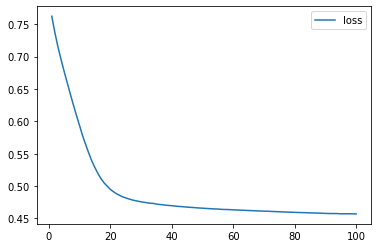

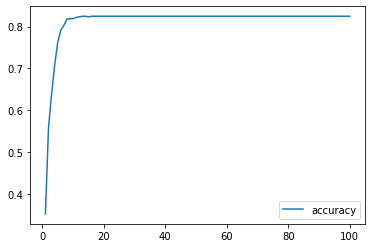

In [79]:
# Create a DataFrame with the history dictionary and an index parameter
df_history_deep_6 = pd.DataFrame(model_deep_6.history, index=range(1, len(model_deep_6.history["loss"]) + 1))

# Plot the loss where the y-axis displays the loss metric
df_history_deep_6.plot(y="loss")

# Plot the accuracy
df_history_deep_6.plot(y="accuracy")

#### *Evaluate the model using testing data and the evaluate method.

In [80]:
# Evaluate deep neural network model using testing data
model_deep_6_loss, model_deep_6_accuracy = nn_deep_6.evaluate(X_key_class_test_scaled, y_key_class_test, verbose=2)

8/8 - 0s - loss: 0.4549 - accuracy: 0.8182


### Make predictions with the shallow neural network model

In [81]:
# Make predictions with the model
predictions_deep_6 = (nn_deep_6.predict(X_key_class_test_scaled) > 0.5).astype("int32") 

In [82]:
# Create a DataFrame to compare the predictions with the actual values
results_deep_6 = pd.DataFrame({"predictions": predictions_deep_6.ravel(), "actual": y_key_class_test})

# Display sample data
results_deep_6.head(10)

,predictions,actual
148,1,1
449,1,1
871,1,1
638,1,1
890,1,1
189,1,1
754,1,1
195,1,1
504,1,0
567,1,1


In [86]:
#Print the confusion matrix
training_matrix_deep_6 = confusion_matrix(y_key_class_test, predictions_deep_6)
print(training_matrix_deep_6)

[[  0  42]
 [  0 189]]


In [87]:
# Save a classification report
training_report_deep_6 = classification_report(y_key_class_test, predictions_deep_6)

# Then view its output
print(training_report_deep_6)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.82      1.00      0.90       189

    accuracy                           0.82       231
   macro avg       0.41      0.50      0.45       231
weighted avg       0.67      0.82      0.74       231



/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Create a deep neural network for classification with raw data

### Compile the Model

In [88]:
# Define the model - deep neural net with two hidden layers
number_input_features = len(X_raw_class_train_scaled[0])
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 40

# Create a sequential neural network model
nn_deep_raw = Sequential()

# Add the first hidden layer
nn_deep_raw.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn_deep_raw.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer
nn_deep_raw.add(Dense(units=1, activation="sigmoid"))

In [89]:
# Compile the model
nn_deep_raw.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Fit and Evaluate the Neural Network

In [90]:
# Fit the model
model_deep_raw = nn_deep_raw.fit(X_raw_class_train_scaled, y_raw_class_train, epochs=100)

Epoch 1/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5400 - accuracy: 0.8159
Epoch 2/100
22/22 [==============================] - 0s 974us/step - loss: 0.4475 - accuracy: 0.8261
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8333
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8580
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.8725
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.8884
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2533 - accuracy: 0.9000
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2278 - accuracy: 0.9174
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2088 - accuracy: 0.9203
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1924 - accuracy: 0.9290
Epoch 1

22/22 [==============================] - 0s 1ms/step - loss: 5.5083e-04 - accuracy: 1.0000
Epoch 83/100
22/22 [==============================] - 0s 1ms/step - loss: 5.3713e-04 - accuracy: 1.0000
Epoch 84/100
22/22 [==============================] - 0s 2ms/step - loss: 5.0777e-04 - accuracy: 1.0000
Epoch 85/100
22/22 [==============================] - 0s 1ms/step - loss: 4.8879e-04 - accuracy: 1.0000
Epoch 86/100
22/22 [==============================] - 0s 1ms/step - loss: 4.7222e-04 - accuracy: 1.0000
Epoch 87/100
22/22 [==============================] - 0s 1ms/step - loss: 4.5751e-04 - accuracy: 1.0000
Epoch 88/100
22/22 [==============================] - 0s 1ms/step - loss: 4.4543e-04 - accuracy: 1.0000
Epoch 89/100
22/22 [==============================] - 0s 2ms/step - loss: 4.3062e-04 - accuracy: 1.0000
Epoch 90/100
22/22 [==============================] - 0s 1ms/step - loss: 4.1353e-04 - accuracy: 1.0000
Epoch 91/100
22/22 [==============================] - 0s 1ms/step - loss: 4.0

#### *Plot the Loss and Accuracy

<AxesSubplot:>

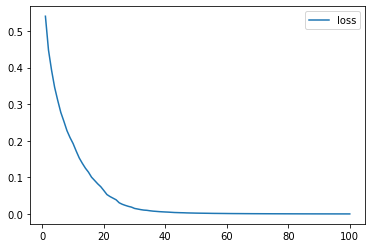

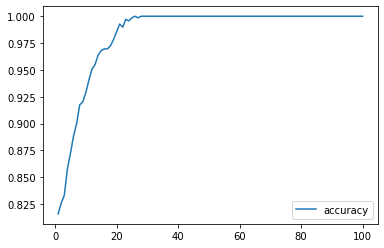

In [91]:
# Create a DataFrame with the history dictionary and an index parameter
df_history_deep_raw = pd.DataFrame(model_deep_raw.history, index=range(1, len(model_deep_raw.history["loss"]) + 1))

# Plot the loss where the y-axis displays the loss metric
df_history_deep_raw.plot(y="loss")

# Plot the accuracy
df_history_deep_raw.plot(y="accuracy")

#### *Evaluate the model using testing data and the evaluate method.

In [92]:
# Evaluate deep neural network model using testing data
model_deep_raw_loss, model_deep_raw_accuracy = nn_deep_raw.evaluate(X_raw_class_test_scaled, y_raw_class_test, verbose=2)

8/8 - 0s - loss: 5.0796 - accuracy: 0.7489


### Make predictions with the shallow neural network model

In [93]:
# Make predictions with the model
predictions_deep_raw = (nn_deep_raw.predict(X_raw_class_test_scaled) > 0.5).astype("int32") 

In [94]:
# Create a DataFrame to compare the predictions with the actual values
results_deep_raw = pd.DataFrame({"predictions": predictions_deep_6.ravel(), "actual": y_raw_class_test})

# Display sample data
results_deep_raw.head(10)

,predictions,actual
148,1,1
449,1,1
871,1,1
638,1,1
890,1,1
189,1,1
754,1,1
195,1,1
504,1,0
567,1,1


In [95]:
#Print the confusion matrix
training_matrix_deep_raw = confusion_matrix(y_raw_class_test, predictions_deep_raw)
print(training_matrix_deep_raw)

[[  9  33]
 [ 25 164]]


In [96]:
# Save a classification report
training_report_deep_raw = classification_report(y_raw_class_test, predictions_deep_raw)

# Then view its output
print(training_report_deep_raw)

              precision    recall  f1-score   support

           0       0.26      0.21      0.24        42
           1       0.83      0.87      0.85       189

    accuracy                           0.75       231
   macro avg       0.55      0.54      0.54       231
weighted avg       0.73      0.75      0.74       231



## Create a Logistic Regression Model with the Original Data

In [109]:
# Import the modules
from sklearn.ensemble import AdaBoostRegressor

In [110]:
regr = AdaBoostRegressor(random_state=1, n_estimators=100)
regr.fit(X_raw_regr_train_scaled, y_raw_regr_train)

AdaBoostRegressor(n_estimators=100, random_state=1)

In [111]:
#Generate testing predictions
#testing_predictions = regr.predict(X_raw_regr_test_scaled)

In [112]:
regr.score(X_raw_regr_test_scaled, y_raw_regr_test)

0.14143392929346732

In [115]:
regr = AdaBoostRegressor(random_state=1, n_estimators=100)
regr.fit(X_key_regr_train_scaled, y_key_regr_train)

AdaBoostRegressor(n_estimators=100, random_state=1)

In [117]:
regr.score(X_key_regr_test_scaled, y_key_regr_test)

0.08260543051877822

In [124]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=1, max_iter=1000)

In [125]:
# Fit the model
logistic_regression_model.fit(X_raw_class_train_scaled, y_raw_class_train)

LogisticRegression(max_iter=1000, random_state=1)

In [126]:
#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_raw_class_test_scaled)

In [128]:
# print testing_report
testing_report = classification_report(y_raw_class_test, testing_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       0.31      0.24      0.27        42
           1       0.84      0.88      0.86       189

    accuracy                           0.77       231
   macro avg       0.58      0.56      0.57       231
weighted avg       0.74      0.77      0.75       231

